In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('churn_analysis.csv')

In [79]:
data

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3328,AZ,192,415,no,yes,36,156.2,77,26.55,...,279.1,83,12.56,9.9,6,2.67,2,2,0.59,False.
3329,3329,WV,68,415,no,no,0,231.1,57,39.29,...,191.3,123,8.61,9.6,4,2.59,3,2,0.32,False.
3330,3330,RI,28,510,no,no,0,180.8,109,30.74,...,191.9,91,8.64,14.1,6,3.81,2,1,0.47,False.
3331,3331,CT,184,510,yes,no,0,213.8,105,36.35,...,139.2,137,6.26,5.0,10,1.35,2,2,0.32,False.


In [3]:
data.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
data

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,...,279.1,83,12.56,9.9,6,2.67,2,2,0.59,False.
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,...,191.3,123,8.61,9.6,4,2.59,3,2,0.32,False.
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,...,191.9,91,8.64,14.1,6,3.81,2,1,0.47,False.
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,...,139.2,137,6.26,5.0,10,1.35,2,2,0.32,False.


In [50]:
data['is_churn'] = data['churn'] == 'True.'
data_1 = data[data['treatment'] == 1]
data_2 = data[data['treatment'] == 2]
data_0 = data[data['treatment'] == 0]

In [70]:
data_1_churn_rate = data_1['is_churn'].sum() / data_1.shape[0]
data_2_churn_rate = data_2['is_churn'].sum() / data_2.shape[0]
data_0_churn_rate = data_0['is_churn'].sum() / data_0.shape[0]

In [71]:
data_1_churn_rate

0.1640838650865998

In [72]:
data_2_churn_rate

0.12511332728921123

In [73]:
data_0_churn_rate

0.14563106796116504

In [67]:
stats.binom_test(data_0['is_churn'].sum(), data_0.shape[0], data_1_churn_rate, alternative = 'two-sided')

0.09993556015819599

In [68]:
stats.binom_test(data_2['is_churn'].sum(), data_2.shape[0], data_1_churn_rate, alternative = 'two-sided')

0.00034193543958821416

In [69]:
stats.binom_test(data_2['is_churn'].sum(), data_2.shape[0], data_0_churn_rate, alternative = 'two-sided')

0.05468162309253552

In [ ]:
def proportions_confint_diff_independant(suc1, len1, suc2, len2, alpha = 0.05):    
    z = sps.norm.ppf(1 - alpha / 2.)   
    p1 = suc1 / len1
    p2 = suc2 / len2
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len1 + p2 * (1 - p2)/ len2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len1 + p2 * (1 - p2)/ len2)
    
    return (left_boundary, right_boundary)

proportions_confint_diff_independant(104, 11037, 189, 11034)

In [6]:
states = data_1['state'].unique()

In [9]:
import scipy

In [96]:
state_pairs = []
num_colored = 0
for state1 in states:
    for state2 in states:
        if state1 != state2 and set((state1, state2)) not in state_pairs:
            subdata = data_1[data_1['state'].isin((state1, state2))]
            state_pairs.append(set((state1, state2)))
            obs = pd.crosstab(subdata['state'], subdata['churn'])
            if scipy.stats.chi2_contingency(obs, correction=False)[1] <= 0.05:
                num_colored += 1
print(num_colored)

34


In [98]:
state_pairs = []
num_colored = 0
for state1 in states:
    for state2 in states:
        if state1 != state2 and set((state1, state2)) not in state_pairs:
            subdata = data_1[data_1['state'].isin((state1, state2))]
            state_pairs.append(set((state1, state2)))
            obs = pd.crosstab(subdata['state'], subdata['churn'])
            if scipy.stats.chi2_contingency(obs, correction=True)[1] <= 0.05:
                num_colored += 1
print(num_colored)

0


In [11]:
from scipy import stats

In [12]:
state_pairs = []
num_colored = 0
for state1 in states:
    for state2 in states:
        if state1 != state2 and set((state1, state2)) not in state_pairs:
            subdata = data_1[data_1['state'].isin((state1, state2))]
            state_pairs.append(set((state1, state2)))
            obs = pd.crosstab(subdata['state'], subdata['churn'])
            if stats.fisher_exact(obs)[1] <= 0.05:
                num_colored += 1
print(num_colored)

10


In [14]:
data[['day_calls', 'mes_estim']].corr()

,day_calls,mes_estim
day_calls,1.000000,-0.051794
mes_estim,-0.051794,1.000000


In [18]:
stats.pearsonr(data.day_calls, data.mes_estim)

(-0.051794350587572625, 0.0027798836869738384)

In [19]:
stats.spearmanr(data.day_calls, data.mes_estim)

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170541)

<AxesSubplot:xlabel='day_calls', ylabel='mes_estim'>

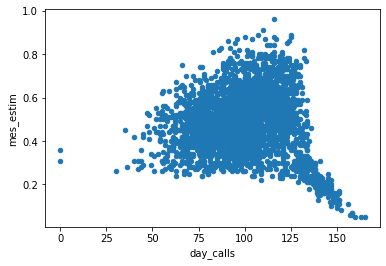

In [23]:
data[['day_calls', 'mes_estim']].plot.scatter(x = 'day_calls', y = 'mes_estim')

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([  0,   0,  30, ..., 160, 163, 165])),
 (20.063266290158996, 100.43564356435644, 0.998901696930284))

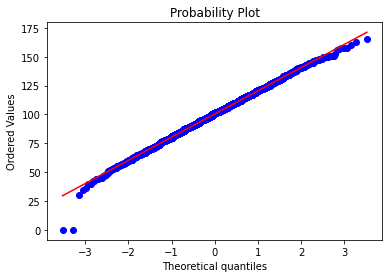

In [26]:
probplot(data.day_calls, plot = plt)

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([0.05, 0.05, 0.05, ..., 0.89, 0.91, 0.96])),
 (0.1386170802069337, 0.4842364236423642, 0.9996050483985331))

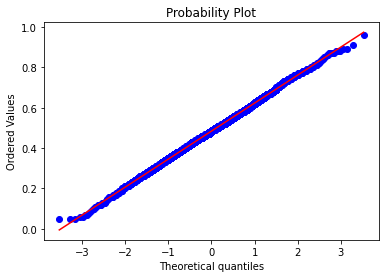

In [27]:
probplot(data.mes_estim, plot = plt)

<AxesSubplot:xlabel='state', ylabel='churn'>

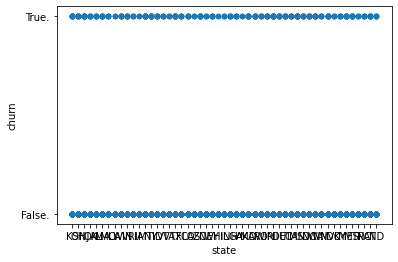

In [28]:
data[['state', 'churn']].plot.scatter(x = 'state', y = 'churn')

In [31]:
def cramers_v(confusion_matrix):
    if confusion_matrix.shape[0] == 1:
        return 0
    else:
        n = confusion_matrix.sum().sum()
        if n == 0:
            return 0
        chi2 = stats.chi2_contingency(confusion_matrix)[0]
        phi2 = chi2 / n
        r,k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [32]:
cramers_v(pd.crosstab(data.state, data.churn))

0.09956204952446517

In [33]:
data.state.nunique()

51

In [34]:
from scipy.stats import chi2

In [35]:
x = chi2(52)

In [36]:
x.cdf(0.099)

2.7127854884738745e-61

In [37]:
cr = pd.crosstab(data.state, data.churn)

In [38]:
cr

churn,False.,True.
state,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9
CO,57,9
CT,62,12
DC,49,5
DE,52,9


In [40]:
(cr['True.'].values < 5).sum()

5

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('ab_browser_test.csv')

In [3]:
data_exp = data[data['slot'] == 'exp']
data_con = data[data['slot'] == 'control']

In [4]:
exp_num_cl = data_exp['n_clicks'].sum()
con_num_cl = data_con['n_clicks'].sum()

In [7]:
exp_num_cl / con_num_cl

1.0161356898244158

In [5]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [6]:
exp_cl = data_exp['n_clicks'].values
con_cl = data_con['n_clicks'].values

In [9]:
np.random.seed(0)

exp_median_scores = list(map(np.median, get_bootstrap_samples(exp_cl, 300)))
con_median_scores = list(map(np.median, get_bootstrap_samples(con_cl, 300)))

print("95% confidence interval for the EXP median number of clicks:",  stat_intervals(exp_median_scores, 0.05))
print("95% confidence interval for the CON median number of clicks:",  stat_intervals(con_median_scores, 0.05))

95% confidence interval for the EXP median number of clicks: [5. 5.]
95% confidence interval for the CON median number of clicks: [4. 4.]


In [8]:
print("difference between medians:", np.median(exp_cl) - np.median(con_cl))

difference between medians: 1.0


In [10]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(exp_median_scores, con_median_scores)))

In [11]:
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [-1. -1.]


In [23]:
np.random.seed(0)

exp_mean_scores = list(map(np.mean, get_bootstrap_samples(exp_cl, 300)))
con_mean_scores = list(map(np.mean, get_bootstrap_samples(con_cl, 300)))

print("95% confidence interval for the EXP median number of clicks:",  stat_intervals(exp_mean_scores, 0.05))
print("95% confidence interval for the CON median number of clicks:",  stat_intervals(con_mean_scores, 0.05))

95% confidence interval for the EXP median number of clicks: [11.50789349 11.66348063]
95% confidence interval for the CON median number of clicks: [11.21054062 11.37136686]


In [25]:
print("difference between means:", np.mean(exp_cl) - np.mean(con_cl))

difference between means: 0.3030947340656329


In [26]:
delta_mean_scores = list(map(lambda x: x[1] - x[0], zip(exp_mean_scores, con_mean_scores)))

In [27]:
print("95% confidence interval for the difference between means",  stat_intervals(delta_mean_scores, 0.05))

95% confidence interval for the difference between means [-0.40446773 -0.20230151]


In [28]:
n_boot_samples = 300

In [29]:
samples = get_bootstrap_samples(con_cl, n_boot_samples)

In [30]:
means = list(map(np.mean, samples))

In [32]:
control_boot_chi_squared = []

In [33]:
for i in range(n_boot_samples):
    sum_sq = 0
    for x in samples[i]:
        sum_sq += (x - means[i])**2
    control_boot_chi_squared.append(sum_sq)

In [25]:
from scipy.stats import probplot

In [24]:
import matplotlib.pyplot as plt

((array([-2.83270147, -2.5363011 , -2.36847471, -2.24887944, -2.15478411,
         -2.07661294, -2.00938931, -1.95018201, -1.89711324, -1.84890481,
         -1.80464581, -1.76366326, -1.72544529, -1.68959313, -1.65578984,
         -1.62377915, -1.5933508 , -1.56433003, -1.53656998, -1.50994596,
         -1.48435118, -1.45969344, -1.43589258, -1.41287842, -1.39058917,
         -1.36897015, -1.34797267, -1.32755325, -1.30767283, -1.28829622,
         -1.26939159, -1.25093005, -1.23288529, -1.21523328, -1.19795202,
         -1.1810213 , -1.16442252, -1.1481385 , -1.13215338, -1.11645243,
         -1.10102199, -1.08584934, -1.07092263, -1.0562308 , -1.04176348,
         -1.02751099, -1.01346422, -0.99961462, -0.98595415, -0.97247524,
         -0.95917073, -0.94603388, -0.93305829, -0.92023793, -0.90756706,
         -0.89504026, -0.88265235, -0.87039844, -0.85827385, -0.84627414,
         -0.83439507, -0.82263259, -0.81098284, -0.79944213, -0.78800692,
         -0.77667384, -0.76543965, -0.

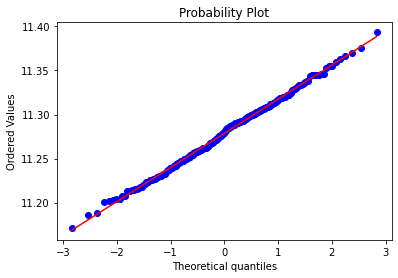

In [39]:
probplot(means, plot = plt)

((array([234.3945893 , 240.60296549, 244.16727199, 246.7289767 ,
         248.75723032, 250.45079343, 251.91340466, 253.20637602,
         254.36910001, 255.42845761, 256.40364847, 257.30888592,
         258.15500017, 258.95044235, 259.70194001, 260.41494028,
         261.09391861, 261.74259911, 262.36411558, 262.96113133,
         263.53592983, 264.09048451, 264.62651308, 265.14552038,
         265.6488326 , 266.1376248 , 266.61294334, 267.07572424,
         267.5268084 , 267.96695418, 268.39684809, 268.81711362,
         269.22831894, 269.63098328, 270.02558251, 270.41255389,
         270.79230025, 271.16519354, 271.53157796, 271.89177272,
         272.24607443, 272.59475924, 272.93808472, 273.27629151,
         273.60960481, 273.9382357 , 274.26238232, 274.58223096,
         274.89795698, 275.20972568, 275.51769306, 275.82200656,
         276.12280569, 276.42022255, 276.71438245, 277.0054043 ,
         277.29340111, 277.57848038, 277.86074445, 278.14029083,
         278.41721256, 27

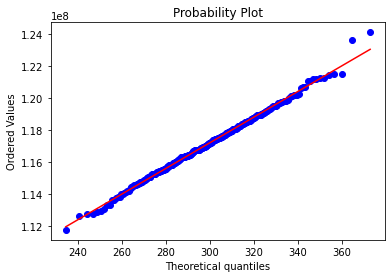

In [41]:
probplot(control_boot_chi_squared, dist="chi2", 
                     sparams=(n_boot_samples-1), plot=plt)

In [45]:
data_exp2 = data_exp.groupby(by = 'userID')['n_clicks'].sum()

In [46]:
data_con2 = data_con.groupby(by = 'userID')['n_clicks'].sum()

In [48]:
data_exp2

userID
1         23
3          3
5         29
7         54
9          6
          ..
603129     0
603130     0
603131     4
603134     4
603137     3
Name: n_clicks, Length: 281450, dtype: int64

# Мана_Уитни
$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [47]:
from scipy import stats

In [49]:
stats.mannwhitneyu(data_exp2.values, data_con2.values)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

In [51]:
data['browser'].value_counts()

Browser #4     156833
Browser #22    142905
Browser #2     110737
Browser #14     89123
Browser #20     33929
Browser #17     32607
Name: browser, dtype: int64

In [53]:
n_browsers = data['browser'].nunique()

In [54]:
browsers = data['browser'].unique()

In [55]:
browser_data = []
for bro in browsers:
    slice_data = data[data['browser'] == bro]
    browser_data.append(slice_data)

In [57]:
browser_data[0]

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
19,29,Browser #2,control,9,9,3
21,31,Browser #2,exp,7,12,6
22,32,Browser #2,control,3,5,3
28,38,Browser #2,exp,39,23,8
...,...,...,...,...,...,...
566113,603117,Browser #2,control,10,3,0
566123,603127,Browser #2,exp,0,1,1
566127,603131,Browser #2,exp,4,4,1
566130,603134,Browser #2,exp,4,2,0


In [58]:
num_paiwises = n_browsers
new_alpha = 0.05 / num_paiwises 
new_alpha

0.008333333333333333

In [59]:
for bro_data in browser_data:
    con_data = bro_data[bro_data['slot'] == 'control']
    exp_data = bro_data[bro_data['slot'] == 'exp']
    print(stats.mannwhitneyu(con_data['n_clicks'].values, exp_data['n_clicks'].values)[1])

0.0272438604197241
0.40760617658454984
0.0
0.03740060143010802
0.45366656388735377
0.2574055152210032


In [70]:
for bro_data in browser_data:
    con_data = bro_data[bro_data['slot'] == 'control']
    exp_data = bro_data[bro_data['slot'] == 'exp']
    print(con_data['n_nonclk_queries'].sum() / con_data['n_queries'].sum() * 100, \
    exp_data['n_nonclk_queries'].sum() / exp_data['n_queries'].sum() * 100)

45.96274717919465 44.982746948554706
46.97092963514274 45.14294190358467
57.59041136008114 43.755617361273295
36.29936674628208 36.93741284866483
40.540484743383296 38.97737648371716
40.593976593513354 39.85394721969546
